# Librerias

In [63]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np


# Algoritmos multipasos

## Solución exacta

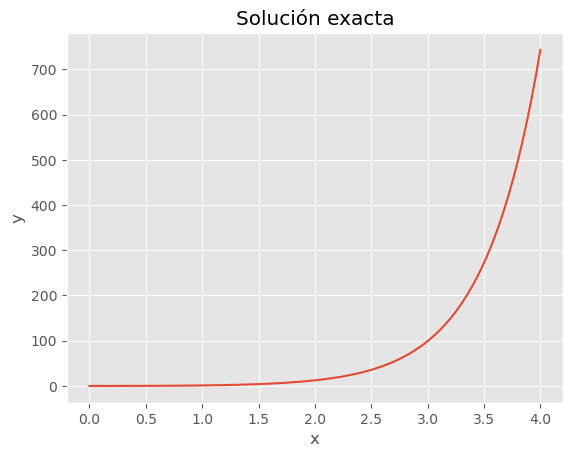

In [64]:
def sol_exacta(x):
    return -(x/2)-((1-np.e**(2*x))/4)

x_ = np.linspace(0.,4.,100)
sol = sol_exacta(x_)

plt.plot(x_,sol)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Solución exacta")
plt.show()

## Solución númerica Runge Kutta 4

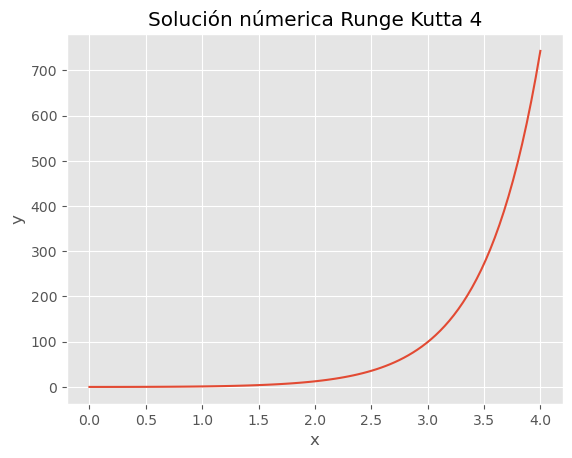

In [65]:
def f(x,y):
    return x + 2*y  

x = np.linspace(0.,4.,100)
y = np.zeros_like(x)

def Runge_Kutta4(x,y,y0):
    
    h = x[1] - x[0]

    for i in range(1,len(x)):
        k1 = f(x[i-1], y[i-1])
        k2 = f(x[i-1]+(h/2),y[i-1] + (h/2)*k1)
        k3 = f(x[i-1]+(h/2),y[i-1] + (h/2)*k2)
        k4 = f(x[i-1] + h, y[i-1] + k3*h)
        
        y[i] = y[i-1] + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
        
    return y

Runge_Kutta4(x,y,0.)

plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Solución númerica Runge Kutta 4")
plt.show()

# Solución adaptativa y comparación de las soluciones númericas y solución exacta

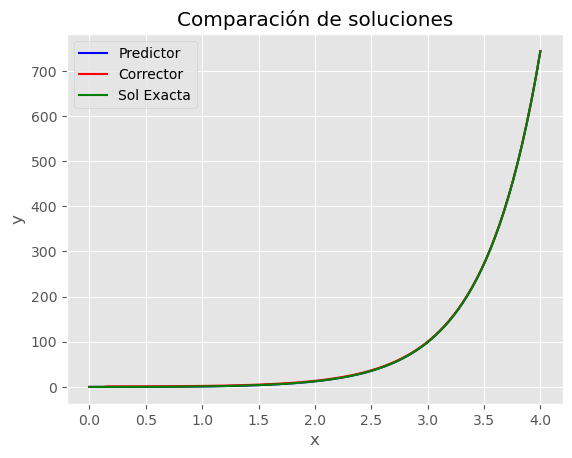

In [66]:
yrk4 = Runge_Kutta4(x,y,0.)

def UpdateI(f,x,yrk4):
    
    h = x[1] - x[0]
    
    y_ = yrk4.copy()
    
    yc = y_.copy()
    
    for i in range(4, len(x)):
        
        y_[i] = y_[i-1] + h * ((475/1440)*f(x[i-1], y[i-1]) + (1427/1440)*f(x[i-2], y[i-2]) - (798/1440)*f(x[i-3], y[i-3]) + (482/1440)*f(x[i-4], y[i-4]) - (173/1440)*f(x[i-5], y[i-5]) + (27/1440)*f(x[i-6], y[i-6]))
        
        yc[i] = y_[i]
        
        yc[i] = yc[i-1] + h * ((475/1440)*f(x[i], y[i]) + (1427/1440)*f(x[i-1], y[i-1]) - (798/1440)*f(x[i-2], y[i-2]) + (482/1440)*f(x[i-3], y[i-3]) - (173/1440)*f(x[i-4], y[i-4]) + (27/1440)*f(x[i-5], y[i-5]))
    
    return y, yc
y_1, y_2 = UpdateI(f,x,yrk4)

plt.plot(x,y_1, "b", label = "Predictor")
plt.plot(x,y_2, "r", label = "Corrector")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x,sol, "g", label = "Sol Exacta")
plt.legend()
plt.title("Comparación de soluciones")
plt.show()


# Errores númericos para el paso adaptativo

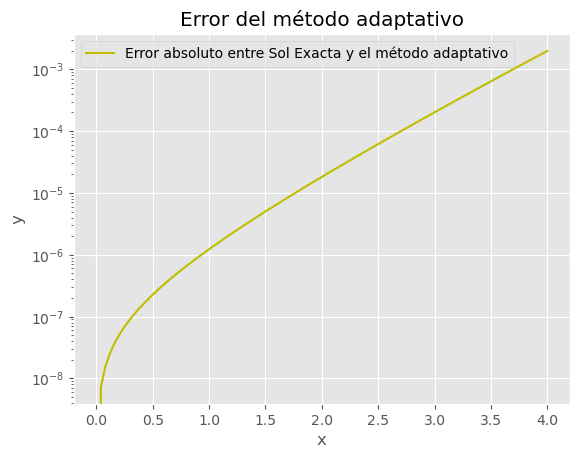

In [67]:
plt.semilogy(x,np.abs(sol-y_1), "y", label = "Error absoluto entre Sol Exacta y el método adaptativo")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Error del método adaptativo")
plt.show()

# Decaimiento de partículas

## a) El sistema acoplado de ecuaciones diferenciales de primer orden es:

$\overset{.}{A} = -\lambda_A N_A$

$\overset{.}{B} = \lambda_A N_A - \lambda_B N_B$

$\overset{.}{C} = \lambda_C N_B$

b)


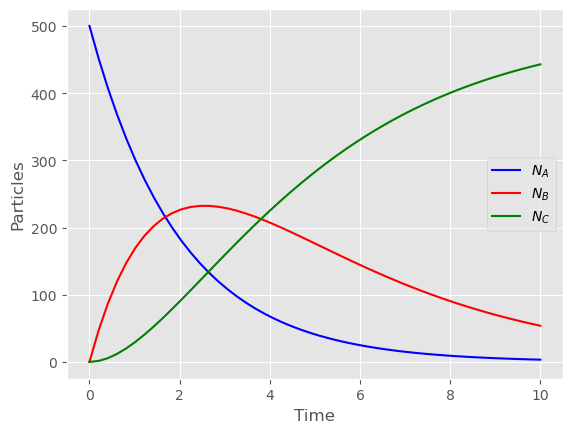

In [68]:
print("b)")
def model(Z,t):
    dAdt = -0.5*Z[0]
    dBdt = 0.5*Z[0] - 0.3*Z[1]
    dCdt = 0.3*Z[1]
    return [dAdt,dBdt,dCdt]

InitialConditions = [500,0,0]
Time = np.linspace(0,10,50)


Solution = odeint(model,InitialConditions,Time)



plt.plot(Time,Solution [:,0],color="blue",label=r"$N_A$")
plt.plot(Time,Solution [:,1],color="red",label=r"$N_B$")
plt.plot(Time,Solution [:,2],color="green",label=r"$N_C$")
plt.ylabel('Particles')
plt.xlabel('Time')
plt.legend(loc='best')
plt.show()

In [69]:
A,B,C = Solution[:,0],Solution[:,1],Solution[:,2]

MaxNumberB = np.max(B)
TimeMaxB = Time[np.argmax(B)]
ParticlesC= C[np.argmax(B)]

print("f) El número máximo de particulas en B fue {MaxNumberB}. ".format(MaxNumberB=MaxNumberB ))
print("g) El tiempo donde B fue máxima fue en : {TimeMaxB}. ".format(TimeMaxB=TimeMaxB))
print("En el tiempo donde hubo el número máximo de particulas hubieron {ParticlesC}. ".format(ParticlesC=ParticlesC) )



f) El número máximo de particulas en B fue 232.21284866825457. 
g) El tiempo donde B fue máxima fue en : 2.6530612244897958. 
En el tiempo donde hubo el número máximo de particulas hubieron 135.08893688126986. 


## h) 
La condición física para el máximo de partículas en $B$ es que la tasa de creación de particulas en $C$, sea igual a la tasa de decaimiento de partículas en $A$, es decir que el número de partículas $C$ que son creados sea igual al número de partículas que decaen en $A$. Lo anterior garantiza que exista un punto estacionario en la tasa de cambio de partículas $B$ en el tiempo, este punto lo inferimos como un máximo debido a que la condición física inicial $[500,0,0]$ nos dice que inicialmente se deben empezar creando partículas en $B$ hasta un máximo donde empiezan a decaer (segunda derivada 0).

$\square$